In [1]:
#import all basic libraries
import pandas as pd
import numpy as nb
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# To load the dataset 
df=pd.read_csv('kaggle_diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [4]:
#checking the summary of dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
#checking null values 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

observation:
    There is no null values in dataset.

In [6]:
#cross check null values 
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<AxesSubplot:>

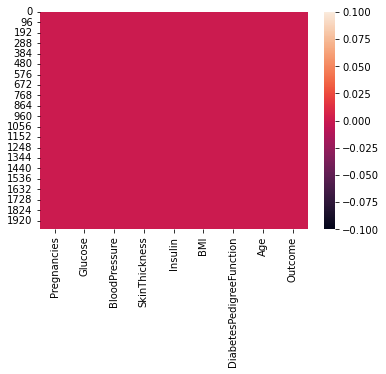

In [7]:
#check null values in visualization form.
sb.heatmap(df.isnull())

In [8]:
#check dublicate values.
df.duplicated().sum()

1256

observation:
    there are 1256 duplicates are present in dataset.

In [9]:
# to see duplicate row.
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
483,0,84,82,31,125,38.2,0.233,23,0
484,0,145,0,0,0,44.2,0.630,31,1
485,0,135,68,42,250,42.3,0.365,24,1
486,1,139,62,41,480,40.7,0.536,21,0
487,0,173,78,32,265,46.5,1.159,58,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [10]:
# remove duplicates values permanent
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df['Outcome'].value_counts()

0    491
1    253
Name: Outcome, dtype: int64

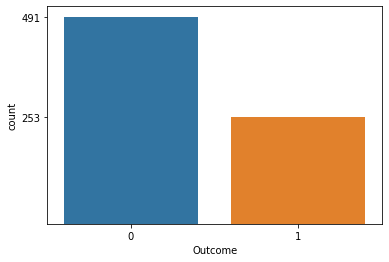

In [13]:
sb.countplot(data=df,x='Outcome')
f=df['Outcome'].value_counts()
plt.yticks(f)
plt.show()

observation:
    its a balance scale.

In [14]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [15]:
#preparing the model by dividing data into 70:30 ratio
#by using train_test_split of sklearn library
from sklearn.model_selection import train_test_split
#creating an object
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [16]:
#create a function 
def create_model (model):   #model is parameter which gonna hold the object of algo
    #train the model
    model.fit(x_train,y_train)
    #test the model
    y_predict=model.predict(x_test)
    #generating the report
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_predict))
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(y_test,y_predict))
    return model

In [17]:
#now before giving the data to the machine we have to do scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [18]:
#training the model by using logistic regression class of sklearn library
from sklearn.linear_model import LogisticRegression
#creating an object of LogisticRegression class
lr=LogisticRegression()


In [19]:
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       154
           1       0.68      0.60      0.64        70

    accuracy                           0.79       224
   macro avg       0.75      0.74      0.74       224
weighted avg       0.78      0.79      0.78       224

[[134  20]
 [ 28  42]]


In [20]:
#the accuracy is not good.

# Decision Tree

In [21]:
#now we use decision tree for selecting the important feature.
#beacuse logistic regression doesn't select the feature.
#decision tree also inreace the accuacry score.
#import Decision tree class
from sklearn.tree import DecisionTreeClassifier
#create the object the Decisiontreeclassifier
dt=DecisionTreeClassifier()
#call dtc funcation
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       154
           1       0.41      0.44      0.42        70

    accuracy                           0.62       224
   macro avg       0.57      0.58      0.57       224
weighted avg       0.63      0.62      0.63       224

[[109  45]
 [ 39  31]]


In [22]:
dt.feature_importances_

array([0.06873991, 0.30255907, 0.08289546, 0.05876096, 0.04013797,
       0.15345753, 0.16690043, 0.12654866])

In [23]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [24]:
dict={'input':x.columns,'ig':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('ig',axis=0,ascending=False,ignore_index=True)

,input,ig
0,Glucose,0.302559
1,DiabetesPedigreeFunction,0.166900
2,BMI,0.153458
3,Age,0.126549
4,BloodPressure,0.082895
5,Pregnancies,0.068740
6,SkinThickness,0.058761
7,Insulin,0.040138


In [25]:
df1

,input,ig
0,Pregnancies,0.068740
1,Glucose,0.302559
2,BloodPressure,0.082895
3,SkinThickness,0.058761
4,Insulin,0.040138
5,BMI,0.153458
6,DiabetesPedigreeFunction,0.166900
7,Age,0.126549


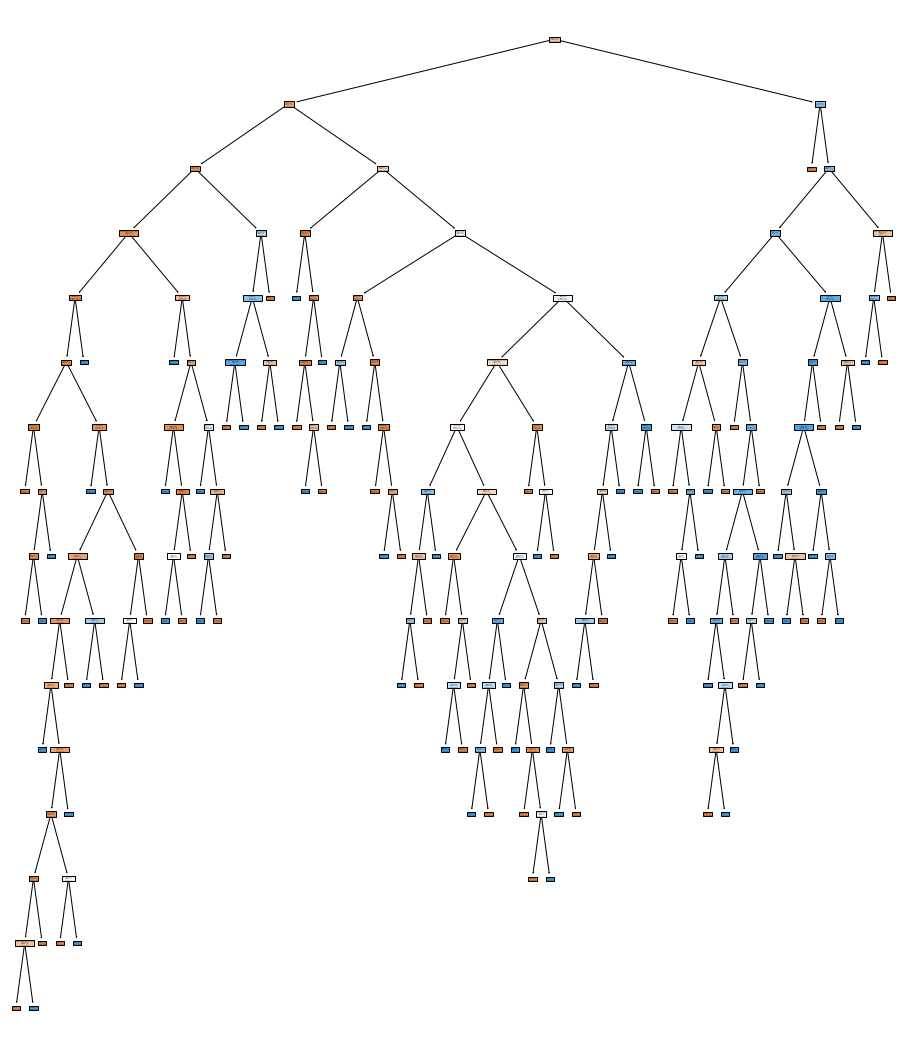

In [26]:
from sklearn import tree
plt.figure(figsize=(16,19))
features=x.columns
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [27]:
#accuarcy is not good.

# Puruning tech.

In [28]:
#accuarcy is not good.
#we use puruning tech for reduced the overfiting.
dt1=DecisionTreeClassifier(max_depth=8,random_state=1)

In [29]:
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       154
           1       0.45      0.54      0.49        70

    accuracy                           0.65       224
   macro avg       0.61      0.62      0.61       224
weighted avg       0.67      0.65      0.66       224

[[108  46]
 [ 32  38]]


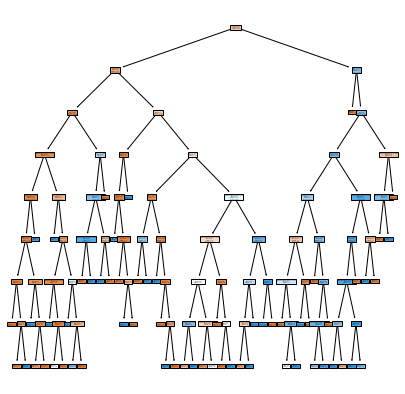

In [30]:
from sklearn import tree
plt.figure(figsize=(7,7))
features=x.columns
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [31]:
dt1.feature_importances_

array([0.04900366, 0.34276652, 0.05984242, 0.03020544, 0.03537579,
       0.18287649, 0.17974189, 0.12018779])

In [32]:
#now checking which feature is important in dt1
dict1={'input':x.columns,'ig':dt1.feature_importances_}
df2=pd.DataFrame(dict1)
df2
df2.sort_values('ig',axis=0,ascending=False,ignore_index=True)

,input,ig
0,Glucose,0.342767
1,BMI,0.182876
2,DiabetesPedigreeFunction,0.179742
3,Age,0.120188
4,BloodPressure,0.059842
5,Pregnancies,0.049004
6,Insulin,0.035376
7,SkinThickness,0.030205


In [33]:

'''for i in range(45,101):
    #preparing the model by calling the class
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print('no of min sample leaf: ',i)
    #now training the model and testing the model and getting classification rport of model
    #by calling the function passing the argument as DecisionTreeClassifier object
    dt2=create_model(dt2)
    dt2
    print()'''
   #here in min_sample_leaf=46 there 0 : 78 and 1: 69 its good accuarcy.

"for i in range(45,101):\n    #preparing the model by calling the class\n    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)\n    print('no of min sample leaf: ',i)\n    #now training the model and testing the model and getting classification rport of model\n    #by calling the function passing the argument as DecisionTreeClassifier object\n    dt2=create_model(dt2)\n    dt2\n    print()"

In [34]:
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=46)
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       154
           1       0.59      0.69      0.63        70

    accuracy                           0.75       224
   macro avg       0.72      0.73      0.72       224
weighted avg       0.76      0.75      0.75       224

[[120  34]
 [ 22  48]]


In [35]:
dict3={'input':x.columns,'ig':dt2.feature_importances_}
df3=pd.DataFrame(dict3)
df3.sort_values('ig',axis=0,ascending=False,ignore_index=True)

,input,ig
0,Glucose,0.678041
1,Age,0.176418
2,BMI,0.133825
3,DiabetesPedigreeFunction,0.011716
4,Pregnancies,0.000000
5,BloodPressure,0.000000
6,SkinThickness,0.000000
7,Insulin,0.000000


# apply Pruning tech using entropy method.

In [36]:

dte=DecisionTreeClassifier(random_state=1,criterion='entropy')
dte=create_model(dte)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       154
           1       0.58      0.54      0.56        70

    accuracy                           0.74       224
   macro avg       0.69      0.68      0.69       224
weighted avg       0.73      0.74      0.73       224

[[127  27]
 [ 32  38]]


In [37]:
#we do pruning tech with help of entropy.
'''
for i in range(8,0,-1):
    #preparing the model
    dte=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=i)
    print('max depth :',i)
    #calling function
    dte=create_model(dte)
    dte
    print()'''
    #here max_depth=7 0:73 ,1:66

"\nfor i in range(8,0,-1):\n    #preparing the model\n    dte=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=i)\n    print('max depth :',i)\n    #calling function\n    dte=create_model(dte)\n    dte\n    print()"

In [38]:
dte1=DecisionTreeClassifier(random_state=1,max_depth=7,criterion='entropy')
dte1=create_model(dte1)

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       154
           1       0.52      0.66      0.58        70

    accuracy                           0.71       224
   macro avg       0.67      0.69      0.68       224
weighted avg       0.73      0.71      0.71       224

[[112  42]
 [ 24  46]]


In [39]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [40]:
dte1.feature_importances_

array([0.05459085, 0.33592431, 0.        , 0.08878603, 0.06312867,
       0.18336543, 0.13182825, 0.14237647])

In [41]:
dicte={'input':x.columns,'ig':dte1.feature_importances_}
dfe=pd.DataFrame(dicte)
dfe.sort_values('ig',axis=0,ascending=False,ignore_index=True)

,input,ig
0,Glucose,0.335924
1,BMI,0.183365
2,Age,0.142376
3,DiabetesPedigreeFunction,0.131828
4,SkinThickness,0.088786
5,Insulin,0.063129
6,Pregnancies,0.054591
7,BloodPressure,0.000000


In [42]:
'''
for i in range(45,101,1):
    #preparing the model
    dtee=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=i)
    print('min_samples_leaf :',i)
    #calling function
    dtee=create_model(dtee)
    dtee
    print()
    '''
#here min_samples_leaf=46 1:69 and 0:79

"\nfor i in range(45,101,1):\n    #preparing the model\n    dtee=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=i)\n    print('min_samples_leaf :',i)\n    #calling function\n    dtee=create_model(dtee)\n    dtee\n    print()\n    "

In [43]:
#preparing the model
#calling the class
dte2=DecisionTreeClassifier(random_state=1,min_samples_leaf=46,criterion='entropy')
#calling function
dte2=create_model(dte2)
dte2

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       154
           1       0.60      0.69      0.64        70

    accuracy                           0.76       224
   macro avg       0.72      0.74      0.73       224
weighted avg       0.77      0.76      0.76       224

[[122  32]
 [ 22  48]]


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=46, random_state=1)

In [44]:
dicte1={'input':x.columns,'ig':dte2.feature_importances_}
dfe1=pd.DataFrame(dicte1)
dfe1.sort_values('ig',axis=0,ascending=False,ignore_index=True)

,input,ig
0,Glucose,0.616373
1,BMI,0.226624
2,Age,0.105920
3,DiabetesPedigreeFunction,0.029281
4,SkinThickness,0.021801
5,Pregnancies,0.000000
6,BloodPressure,0.000000
7,Insulin,0.000000


# esemble : 1.RandomForestClassifier

In [45]:
#call the randomforestclassifier class in sklearn library.
from sklearn.ensemble import RandomForestClassifier

In [46]:
#using hit and trial method to find at minimum number of features
'''for i in range(13,0,-1):
    #creating an object
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)
    #by default gini index.
    print('no of features:',i)
    #calling a function
    rfc=create_model(rfc)
    rfc
    print()'''

"for i in range(13,0,-1):\n    #creating an object\n    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)\n    #by default gini index.\n    print('no of features:',i)\n    #calling a function\n    rfc=create_model(rfc)\n    rfc\n    print()"

In [47]:
#create the object of class of RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_features=2,random_state=1)
#n_estimators means take how many  no .of decisiontree.
#max_features means take how many input.

In [48]:
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       154
           1       0.65      0.60      0.62        70

    accuracy                           0.77       224
   macro avg       0.74      0.73      0.73       224
weighted avg       0.77      0.77      0.77       224

[[131  23]
 [ 28  42]]


# now apply RandomForestClassifier using entropy algo.

In [49]:
#using hit and trial method to find at minimum number of features
for i in range(13,0,-1):
    #creating an object
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1,criterion='entropy')
    #by default gini index.
    print('no of features:',i)
    #calling a function
    rfc=create_model(rfc)
    rfc
    print()

no of features: 13


ValueError: max_features must be in (0, n_features]

In [ ]:
rfc=RandomForestClassifier(n_estimators=10,max_features=7,random_state=1,criterion='entropy')

In [ ]:
rfc=create_model(rfc)

# 2.ADaboost Classifier

In [ ]:
#call the class of AdaBoostclassifier 
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#create the object of AdaBoostClassfier
abc=AdaBoostClassifier()

In [ ]:
#using hit and trial method to find at n_estimators 
'''
for i in range(13,0,-1):
    #preparing the model
    abc=AdaBoostClassifier(n_estimators=i,random_state=1)
    print('no of decision stump',i)
    #now trainging and testing and finding classification report by calling function
    abc=create_model(abc)
    abc
    print()'''
 #n_estimators means how many decision stump
#n_estimators<=100.
#in decision stump 13 we get good recall accuacy.

In [ ]:
abc=AdaBoostClassifier(n_estimators=13,random_state=1)

In [ ]:
abc=create_model(abc)

# 3.GradientBoostingClassifier

In [ ]:
#call the GradientBoostingClassifier class in sklearn.ensemble library
from sklearn.ensemble import GradientBoostingClassifier
#create the object of GradientBoostingClassifierb
gb=GradientBoostingClassifier(n_estimators=56,random_state=1)
gb=create_model(gb)


In [ ]:
'''
for i in range(10,101):
    #prpearing the model
    #creating an object of GradientBoostingClassifier class
    gb=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print('no of estimator of DT: ',i)
    # #now trainging and testing and finding classification report by calling function
    gb=create_model(gb)
    gb
    '''
#the n_estimator =56 is 0:83 and 1:63

# 4.Extremegradientboosting

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
for i in range(10,101,1):
    #prparing the model
    #creating the object of XGBClassifier class
    #automatic overfitting: reg means regularization and alpha or lambda:
    #hyperparameter
    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print('no of estimator',i)
    #calling functon
    xgc=create_model(xgc)
    xgc
    print()

In [ ]:
xgc=XGBClassifier(n_estimators=10,reg_alpha=1,random_state=1)
#reg means regulization alpha means lambda :automatic overfiting
#n_estimators 

In [ ]:
xgc=create_model(xgc)

In [ ]:
#CALL INBULIT CLASS.
#LINER separabledta means linear kernal.
from sklearn.svm import LinearSVC
#linersvc means linear supoort vector classifier.

In [ ]:
#create a object for #create a object for  class
svc=LinearSVC(random_state=1)#bydefalut hardmargin  ,supoose no outlier in my dataset.

In [ ]:
#getting report of model
svc=create_model(svc)
print(svc)

In [ ]:
svc1=LinearSVC(random_state=1,C=0.01)
svc1=create_model(svc1)

In [ ]:
#Using Polynomial Kernel
#Svc is used for both polynomial and radial basis kernel function:both are used for non linear
from sklearn.svm import SVC
#create the object of SVC passing the poly in kernel parameter
polysvc=SVC(random_state=1,kernel='poly')
#Call the function
polysvc=create_model(polysvc)

In [ ]:
#create the object of SVC passing the radial basis in the kernel parameter
radialsvc=SVC(random_state=1,kernel='rbf')
#call the function
radialsvc=create_model(radialsvc)

# KNN algo

In [ ]:
#call the call of kneighborsClassifier.
from sklearn.neighbors import KNeighborsClassifier
#create the object of KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors =5,metric='minkowski',p=2)
#bydefault the n_neighbors is 5 (alway odd )
#p=2 means eucliden metric.
#genrate the report
knc=create_model(knc)